In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

## Simple Linear Regression

In [33]:
# Load data
df = pd.read_csv('data/Advertising.csv', index_col = [0])
xCol = 'TV'
yCol = 'sales'

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


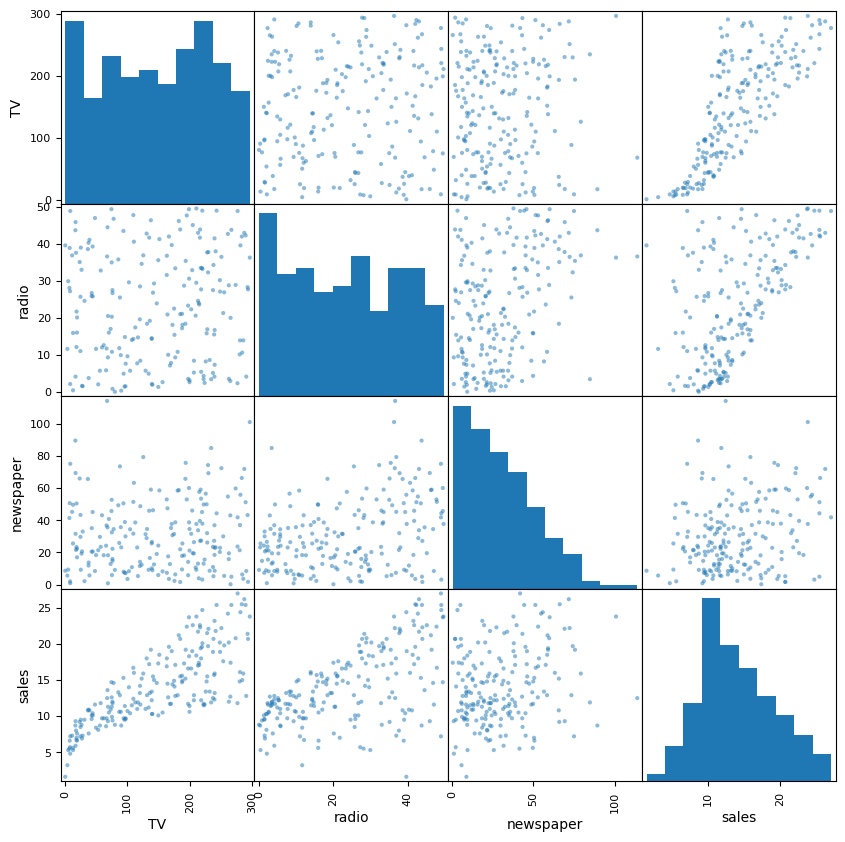

In [34]:
pd.plotting.scatter_matrix(df, figsize = (10, 10))
df.corr()

In [35]:
# Generate the matrices
# y = df[yCol]
# X = pd.DataFrame({'intercept' : np.ones(df.shape[0]), xCol : df[xCol]})
design = MS([xCol]).fit(df)
X = design.transform(df) # or X = design.fit_transform(df)
y = df[yCol]

# Do the linear regression
model = sm.OLS(y, X)
results = model.fit()

# Analyze the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        18:28:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

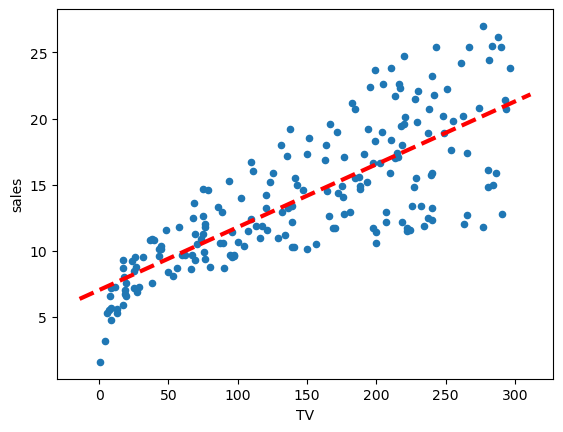

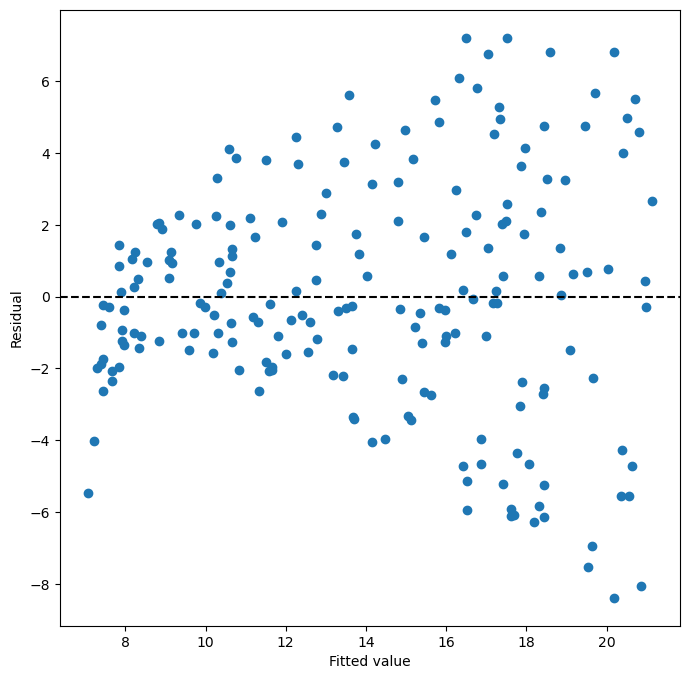

In [36]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
    
ax = df.plot.scatter(xCol, yCol)
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)  

# plot predicted value vs residual
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [22]:
# Do the prediction
newDf = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(newDf)
new_predictions = results.get_prediction(newX)

#new_predictions.summary_frame()
#new_predictions.predicted_mean
#new_predictions.conf_int(alpha=0.05)  #obs=True for prediction interval

## Multiple Linear Regression

In [ ]:
# 1. Is at least one of the predictors X1, X2,...,Xp useful in predicting
# the response?  F-stats
# 2. Do all the predictors help to explain Y , or is only a subset of the
# predictors useful?
# 3. How well does the model ft the data?
# 4. Given a set of predictor values, what response value should we predict,
# and how accurate is our prediction?

In [45]:
yCol = 'sales'
xCol = ['TV', 'radio'] #list(df.columns.drop('sales')) # 

design = MS(xCol).fit(df)
X = design.transform(df) # or X = design.fit_transform(df)
y = df[yCol]

# Do the linear regression
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.83e-98
Time:                        19:03:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""